In [1]:
# Importing the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import preprocessing

In [2]:
# loading the data from csv file to pandas dataframe
data = pd.read_csv("USED-CAR-DATASET.csv")

# Data processing

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
# checking the number of missing values
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
#Dropping null values
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

In [8]:
data = data.dropna(how='any')

In [9]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
#Replacing variables in data
data['Mileage'] = data['Mileage'].str.replace('kmpl','')
data['Mileage'] = data['Mileage'].str.replace('km/kg','')
data['Engine'] = data['Engine'].str.replace('CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace('bhp','')

In [11]:
#changing datatypes
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

In [12]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [13]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


In [14]:
# checking the distribution of categorical data
print(data.Fuel_Type.value_counts())
print(data.Owner_Type.value_counts())
print(data.Transmission.value_counts())
print(data.Name.value_counts())
print(data.Location.value_counts())

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64
Manual       4266
Automatic    1709
Name: Transmission, dtype: int64
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64


In [15]:
#Encoding the Categorical Data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)
data.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
label_encoder=preprocessing.LabelEncoder()
data['Name']=label_encoder.fit_transform(data['Name'])
data['Location']=label_encoder.fit_transform(data['Location'])
print(data.head(10))

   Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1181         9  2010              72000          2             0   
1   504        10  2015              41000          1             0   
2   478         2  2011              46000          0             0   
3  1045         2  2012              87000          1             0   
4    23         3  2013              40670          1             1   
5   522         5  2012              75000          3             0   
6  1358         6  2013              86999          1             0   
7  1758         9  2016              36000          1             1   
8  1826        10  2013              64430          1             0   
9  1562         2  2012              65932          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  Price  
0           0    26.60   998.0   58.16    5.0   1.75  
1           0    19.67  1582.0  126.20    5.0  12.50  
2           0    18.20  1199.0   88.70    5.0   4.50 

<AxesSubplot:>

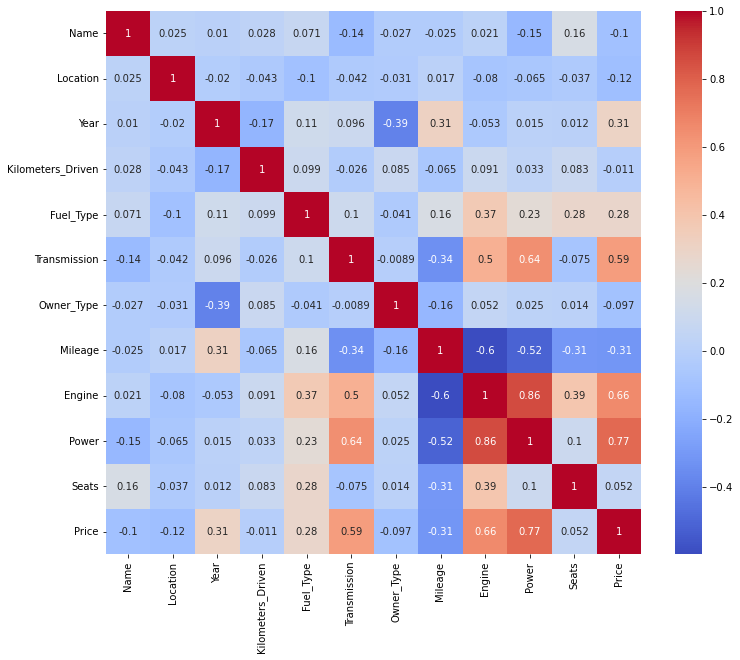

In [17]:
#Visualizing correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') 

In [18]:
#Splitting the data and Target
X = data.drop(['Price'],axis=1)
Y = data['Price']

In [19]:
print(X)

      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0     1181         9  2010              72000          2             0   
1      504        10  2015              41000          1             0   
2      478         2  2011              46000          0             0   
3     1045         2  2012              87000          1             0   
4       23         3  2013              40670          1             1   
...    ...       ...   ...                ...        ...           ...   
6014  1140         4  2014              27365          1             0   
6015   657         6  2015             100000          1             0   
6016   918         6  2012              55000          1             0   
6017  1188         8  2013              46000          0             0   
6018   164         5  2011              47000          1             0   

      Owner_Type  Mileage  Engine   Power  Seats  
0              0    26.60   998.0   58.16    5.0  
1        

In [20]:
print(Y)

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5975, dtype: float64


In [21]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [22]:
#Model Training

#1.Linear Regression
# loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model = LinearRegression()

LinearRegression()

In [24]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6993569548058329


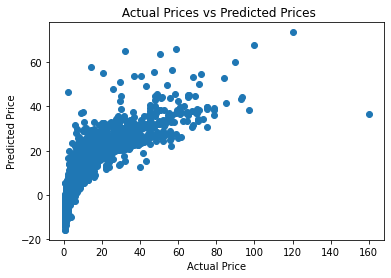

In [26]:
#Visualizing the actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7072695508987716


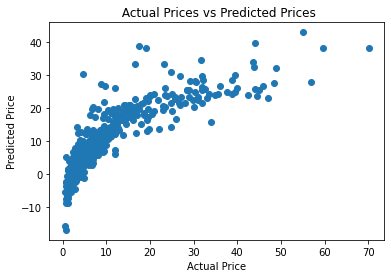

In [29]:
#Visualizing the actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
#2.Lasso Regression
# loading the linear regression model
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [32]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [33]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6821308591718587


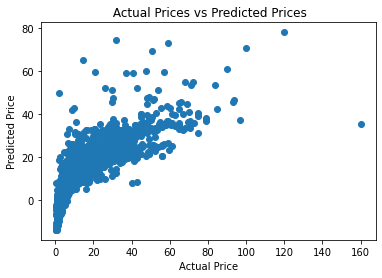

In [34]:
#Visualize the actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [36]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6793692638007777


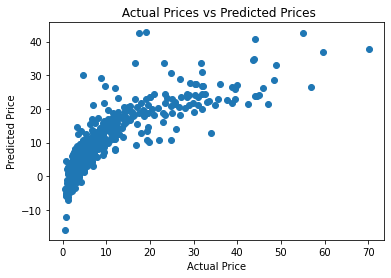

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()